In [1]:
from hibike import Hibike
from matplotlib import pyplot as plt
import time
import binascii
from IPython import display
h = Hibike()

In [ ]:
h.subToDevices([(uid, 10) for uid in h.getUIDs()])

# Continuously print all devices

In [35]:
print h

Hibike:
  Ports:
    /dev/ttyACM2
    /dev/ttyACM1
    /dev/ttyACM0
  Devices:
    Device 33074934739673310674687: ServoControl
    subcription: 0ms @ 1449124229.773702
    dataUpdate: 01 @ 1449123025.459354
    servo0: 0 @ 1449124112.645403
    servo1: 0 @ -1.000000
    servo2: 0 @ -1.000000
    servo3: 0 @ -1.000000

    Device 18369358417563074221: LimitSwitch
    subcription: 0ms @ 1449124229.774909
    dataUpdate: 01 @ 1449123025.459312

    Device 13758425323549998831: LimitSwitch
    subcription: 0ms @ 1449124229.773608
    dataUpdate: 01 @ 1449123025.467509




In [ ]:
from IPython import display
last = ''
while 1:
    if str(h) != last:
        last = str(h)
        display.clear_output(wait=True)
        display.display(last)
    time.sleep(.001)


# Plotting stuff

In [ ]:
%matplotlib inline
c.log = ([], [], [])
time.sleep(1)
c.log[2][0]=2
from IPython import display
while 1:
    plt.subplot(221)
    plt.plot(c.log[0], c.log[1])
    plt.subplot(222)
    plt.plot(c.log[0], c.log[2])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    display.display(binascii.hexlify(device.getParam("dataUpdate")))
    #time.sleep(1)

In [ ]:
%matplotlib inline
#c.log = ([], [], [])
x = 1
time.sleep(.5)
for i in range(1, 100000):
    x *= i
time.sleep(.5)
plt.plot(c.log[0], c.log[1])
plt.title("data updates read vs time")
print "Computation seems to block the hibike thread from reading packets"

In [9]:
def test_latency(uid, param):
    start = time.time()
    h.writeValue(uid, param, 0)
    while h.context[uid].params[param][1] < start:
        pass
    return h.context[uid].params[param][1] - start

In [24]:
latency2 = [test_latency(33074934739673310674687, 1) for _ in range(100)]


In [26]:
latencies = []

In [29]:
while 1:
    latencies.append(test_latency(33074934739673310674687, 1))

KeyboardInterrupt: 

(array([ 29.,  33.,  36.,  36.,  37.,  29.,  39.,  20.,  33.,  21.,  22.,
         27.,  17.,   9.,  12.,  17.,  11.,  11.,   9.,  10.,   6.,   7.,
          4.,   9.,   8.,   9.,   1.,   7.,   4.,   2.,   3.,   2.,   1.,
          3.,   2.,   2.,   0.,   0.,   4.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   1.,   1.,   1.,   0.,   5.,   3.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.00254202,  0.00447628,  0.00641054,  0.0083448 ,  0.01027905,
         0.01221331,  0.01414757,  0.01608183,  0.01801609,  0.01995035,
         0.02188461,  0.02381887,  0.02575313,  0.02768739,  0.02962164,
         0.0315559 ,  0.03349016,  0.03542442,  0.03735868,  0.03929294,
         0.0412272 ,  0.04

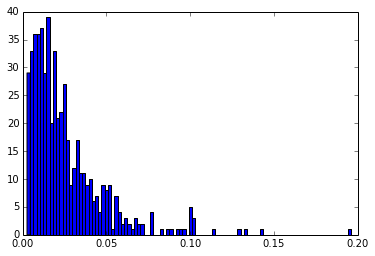

In [32]:
%matplotlib inline
plt.hist(latencies, 100)